In [15]:
%%file methProx.m
function prox_result = methProx(x, lambda_val)
    prox_result = sign(x) .* max(0, abs(x) - lambda_val);
end

Created file 'C:\Users\Hp\Documents\git\Master-AIDC\ML\TP2\methProx.m'.


# perte absolue

In [147]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end
end  
lambda1= 0.001;
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) (sum(abs(y_train - K * omega))+lambda1*norm(omega) )/ n2;
gradJ = @(omega) K' * sign(K * omega - y_train) / n2+lambda1*eye(n2)*omega;


In [148]:
num_iterations = 100000;
losses = zeros(num_iterations, 1);
alpha = 0.01;
epsilon = 1e-6;
omega = zeros(n2, 1);

while (norm(gradJ(omega)) > epsilon && i < num_iterations) 
    current_loss = sum(abs(y_train - K * omega)) / n2;
    losses(i) = current_loss;  % Store the current loss
    grad = gradJ(omega);
    lambda = 0.00001; % Regularization parameter
    omega = methProx(omega - alpha * grad, lambda);
    i=i+1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 3.892203e-01
Nombre d'iteration : 100000


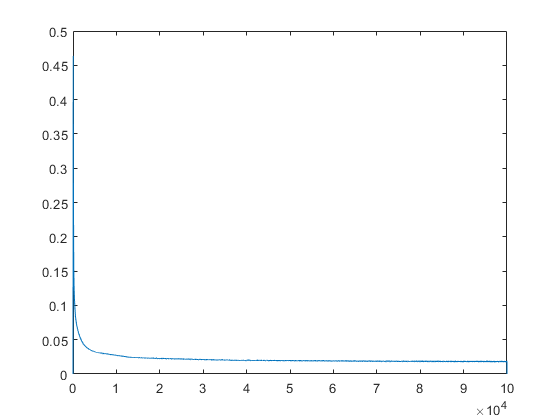

In [149]:
plot(1:num_iterations, losses)

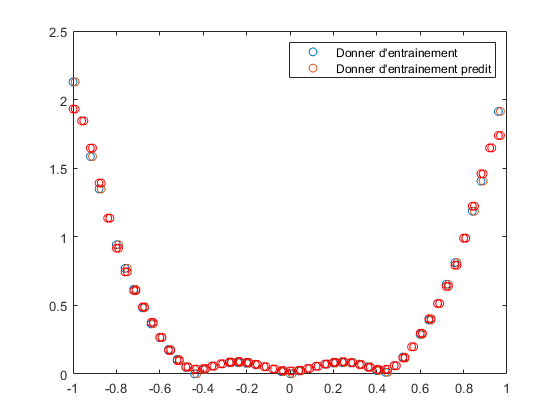

In [150]:
y_predit = K*omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

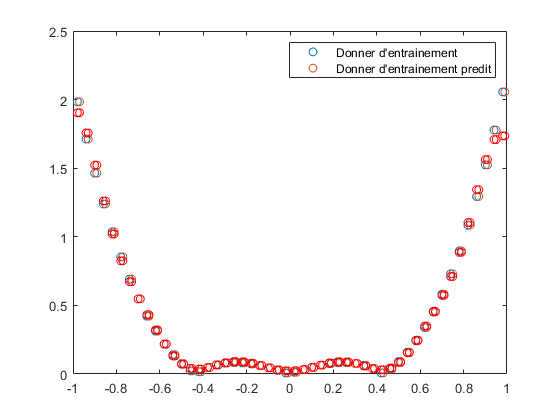

In [151]:
y_predit = K_test*omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

# ε-insensitive loss

In [233]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end
end  
lambda1= 0.001;
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) (sum(abs(y_train - K * omega))+lambda1*norm(omega) )/ n2;
gradJ = @(omega,epsilon) K' * sign(y_train - K * omega) .* (abs(y_train - K * omega) >= epsilon) / n2;


In [235]:
% Initialization
num_iterations = 100000;
losses = zeros(num_iterations, 1);
alpha = 0.001;
epsilon = 0.01; % Adjust epsilon as needed
%omeglambda = 0.000001;a = zeros(n_train, 1);

% Main optimization loop
for i = 1:num_iterations
    % Calculate current loss with ε-insensitive loss
    current_loss = sum(max(0, abs(y_train - K * omega) - epsilon)) / n2;
    losses(i) = current_loss;  % Store the current loss
    
    % Compute subdifferential of the ε-insensitive loss
    grad = gradJ(omega,epsilon);
    
    % Update using the proximal operator for L1 regularization
    lambda = 0.000001; % Regularization parameter
    omega = methProx(omega + alpha * grad, lambda);
    
    % Check convergence based on the norm of the subdifferential
    if norm(grad) < epsilon
        break;  % Break out of the loop if converged
    end
end
fprintf("la norme de gradient : %d\n",norm(grad))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.691254e-02
Nombre d'iteration : 100000


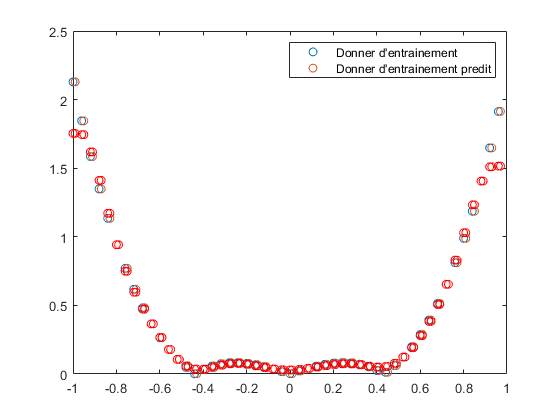

In [236]:
y_predit = K*omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

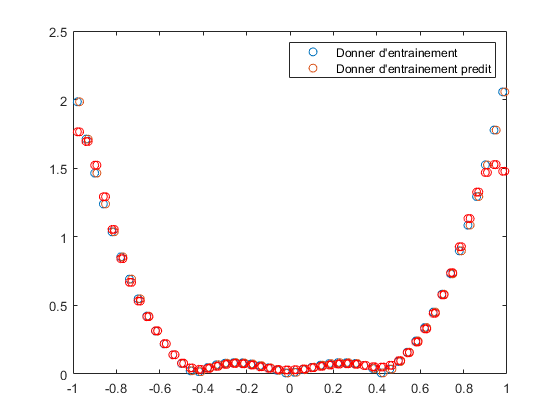

In [237]:
y_predit = K_test*omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

# Huber Loss

In [190]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end
for i = 1:n2
  for j = 1:n2 
    K_test(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end
end  
lambda1= 0.001;
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) (sum(abs(y_train - K * omega))+lambda1*norm(omega) )/ n2;
gradJ = @(omega,residuals,epsilon_huber) K' * (residuals .* (abs(residuals) <= epsilon_huber) + epsilon_huber * sign(residuals) .* (abs(residuals) > epsilon_huber)) / n2;


In [204]:
% Initialization
num_iterations = 100000;
losses = zeros(num_iterations, 1);
alpha = 0.9;
epsilon = 1e-6;
epsilon_huber = 0.1; % Adjust epsilon_huber as needed
%omega = zeros(n2, 1);

% Main optimization loop
for i = 1:num_iterations
    % Calculate current loss with Huber loss
    residuals = y_train - K * omega;
    huber_loss = zeros(size(residuals));
    huber_loss(abs(residuals) <= epsilon_huber) = 0.5 * (residuals(abs(residuals) <= epsilon_huber).^2);
    huber_loss(abs(residuals) > epsilon_huber) = epsilon_huber * (abs(residuals(abs(residuals) > epsilon_huber)) - 0.5 * epsilon_huber);
    current_loss = sum(huber_loss) / n2;
    losses(i) = current_loss;  % Store the current loss
    
    % Compute subdifferential of the Huber loss
    grad = gradJ(omega,residuals,epsilon_huber);
    
    % Update using the proximal operator for L1 regularization
    lambda = 0.000001; % Regularization parameter
    omega = methProx(omega + alpha * grad, lambda);
    

    % Check convergence based on the norm of the subdifferential
    if norm(grad) < epsilon
        break;  % Break out of the loop if converged
    end
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega,residuals,epsilon_huber)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.337488e-05
Nombre d'iteration : 100000


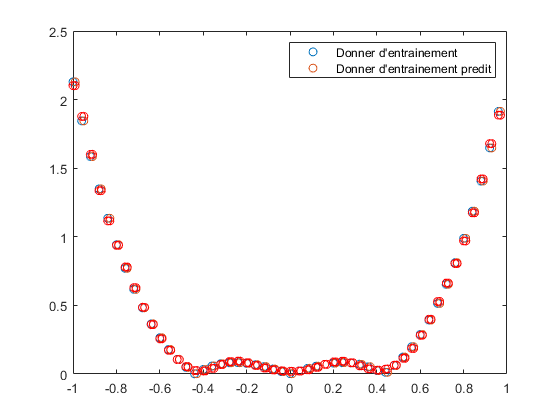

In [205]:
y_predit = K*omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

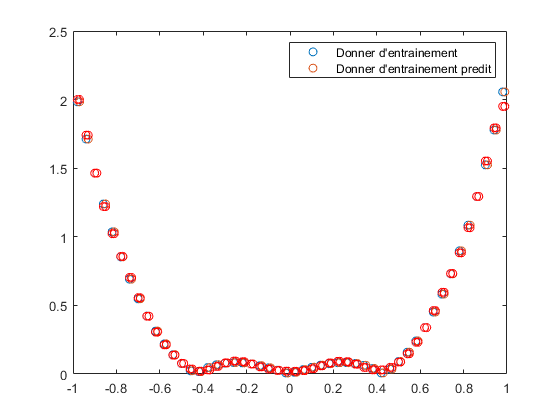

In [206]:
y_predit = K_test*omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_predit, 'ro')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off